### Bayesian Data Analysis, 3rd ed
##  Chapter 6, demo 1

Posterior predictive checking demo

In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# data
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # Here ddof=1 is used to get the sample estimate.
s = np.sqrt(s2)
my = np.mean(y)

In [5]:
# Create 9 random replicate data sets from the posterior predictive density.
# Each set has same number of virtual observations as the original data set.
replicates = np.random.standard_t(n-1, size=(9,n)) * np.sqrt(1+1/n)*s + my

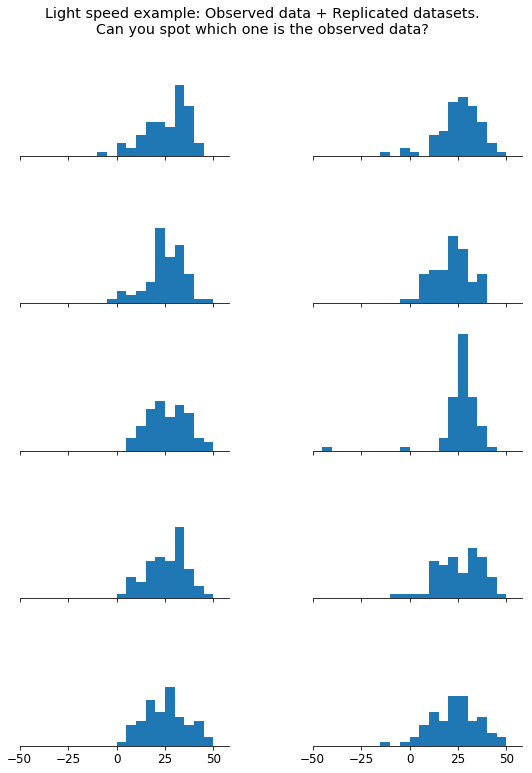

In [6]:
# plot them along with the real data set in random order subplot
fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(9, 12))
fig.subplots_adjust(top=0.95, wspace=0.4)
order = np.random.permutation(10)
for i, ax in enumerate(axes.flat):
    ax.hist(
        replicates[order[i]] if order[i] < 9 else y,
        np.arange(-45, 55, 5)
    )
    plot_tools.modify_axes.only_x(ax)
axes[0, 0].set_xlim([-50, 58])
fig.suptitle(
    "Light speed example: Observed data + Replicated datasets.\n"
    "Can you spot which one is the observed data?"
);

#### Compare the minimum of the real data set into the minimum of a replicated dataset.

The distribution of the minimum value of a replicated data set can be 
calculated analytically. Consider $n$ samples of $X_i$, where $X_i$ has cumulative distribution function $F(x)$ and probability distribution function $f(x)$. The cumulative distribution function of the minimum of the $n$ samples is $1 - (1 - F(x))^n$ and the probability distribution function is its derivative $n f(x) (1 - F(x))^{n-1}$.

In [7]:
# Calculate the pdf of the minumum of a replicated dataset
x = np.linspace(-60, 20, 150)
pdf = stats.t.pdf(x, df=n-1, loc=my, scale=np.sqrt(s2*(1+1/n)))
cdf = stats.t.cdf(x, df=n-1, loc=my, scale=np.sqrt(s2*(1+1/n)))
pdf_min = n * pdf * (1 - cdf)**(n-1)

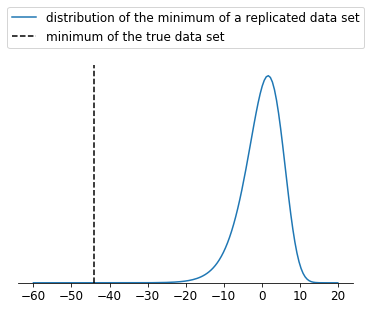

In [8]:
# Plot the real minimum and the distribution of the min of a replicate data set
plt.figure()
plot_tools.modify_axes.only_x(plt.gca())
plt.plot(
    x,
    pdf_min,
    label='distribution of the minimum of a replicated data set'
)
plt.ylim([0, plt.ylim()[1]])  # set y base to zero
plt.axvline(
    y.min(),
    color='k',
    linestyle='--',
    label='minimum of the true data set'
)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05));